In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [4]:
digits = datasets.load_digits()
data = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
data['target'] = digits.target
print(data.head())

   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0      0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
1      0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
2      0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
3      0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
4      0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   

   pixel_8  pixel_9  ...  pixel_55  pixel_56  pixel_57  pixel_58  pixel_59  \
0      0.0      0.0  ...       0.0       0.0       0.0       6.0      13.0   
1      0.0      0.0  ...       0.0       0.0       0.0       0.0      11.0   
2      0.0      0.0  ...       0.0       0.0       0.0       0.0       3.0   
3      0.0      8.0  ...       0.0       0.0       0.0       7.0      13.0   
4      0.0      0.0  ...       0.0       0.0       0.0       0.0       2.0   

   pixel_60  pixel_61  pixel_62  pixel_63  target  
0      10.0     

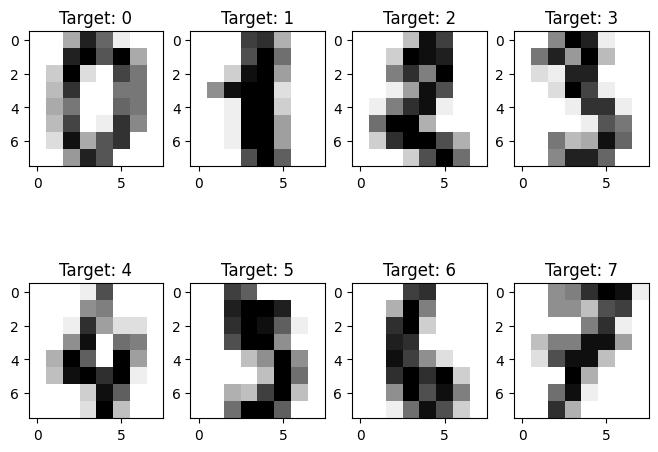

In [5]:
plt.figure(figsize=(8, 6))
for index, (image, label) in enumerate(zip(digits.images[:8], digits.target[:8])):
    plt.subplot(2, 4, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Target: {label}')
plt.show()

In [8]:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [9]:
y_pred = model.predict(X_test)
print(f"Classification report:\n{metrics.classification_report(y_test, y_pred)}")
print(f"Confusion matrix:\n{metrics.confusion_matrix(y_test, y_pred)}")

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

Confusion matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [

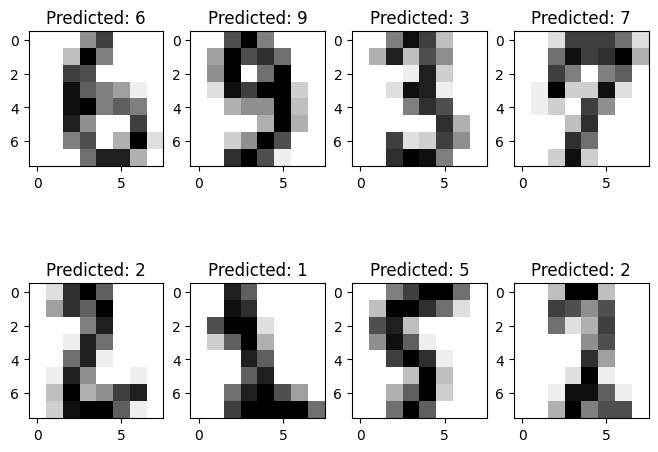

In [10]:
plt.figure(figsize=(8, 6))
for index, (image, prediction) in enumerate(zip(X_test[:8], y_pred[:8])):
    plt.subplot(2, 4, index + 1)
    plt.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Predicted: {prediction}')
plt.show()